In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', None)

# If you also want to display all rows (if needed)
pd.set_option('display.max_rows', None)


In [4]:
data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
data.shape

(9240, 37)

In [8]:
duplicates = data.duplicated()

In [9]:
print(duplicates)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [10]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []


In [11]:
duplicate_rows = data[data.duplicated(subset=['Prospect ID', 'Lead Number'])]
print(duplicate_rows)

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []


In [12]:
# Check for duplicates across multiple columns
duplicate_rows = data[data.duplicated(subset=['Prospect ID', 'Lead Source', 'Lead Number'])]
print(duplicate_rows)


Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []


In [13]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Prospect ID and Lead Number are no longer needed for further analysis since it has unique values, so we can drop it


### Exploratory Data Anlalysis

In [14]:
data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [15]:
data.shape

(9240, 35)

In [16]:
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

In [17]:
##For columns like Lead Source, TotalVisits, Page Views Per Visit, and Last Activity, the missing values are very few.


In [18]:
# Check unique values in each column
print("Lead Source:", data['Lead Source'].unique())

Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


In [19]:
print("TotalVisits:", data['TotalVisits'].unique())

TotalVisits: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]


In [20]:
print("Page Views Per Visit:", data['Page Views Per Visit'].unique())

Page Views Per Visit: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75
  2.8   2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25
  6.71  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6
  2.9   1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21
 12.33  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.
  3.75  6.67  1.54  2.13  2.14  2.45  3.29  4.17  1.63  3.38  1.17 14.5
  3.8   1.19  3.82  2.83  1.93 11.5   2.08]


In [21]:
print("Last Activity:", data['Last Activity'].unique())

Last Activity: ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']


In [22]:
## Categorical Columns
data['Lead Source'].fillna(data['Lead Source'].mode()[0], inplace=True)
data['Last Activity'].fillna(data['Last Activity'].mode()[0], inplace=True)


In [23]:
## Numerical Columns
data['TotalVisits'].fillna(data['TotalVisits'].median(), inplace=True)
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(), inplace=True)


In [24]:
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
dtype: float64


In [25]:
## Columns like Lead Quality, Tags, Asymmetrique Activity Index, and Asymmetrique Profile Score have a significant amount of missing data (over 45%).
## so we might drop the columns

In [26]:
#dropping cols with more than 45% missing values
data = data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis =1)

In [27]:
data.shape

(9240, 31)

In [28]:
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64


In [29]:
data.shape

(9240, 31)

In [30]:
## Now handling these columns which are between 15-29%
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64


In [31]:
import pandas as pd

# Function to impute missing values based on column type
def impute_missing_values(data):
    for column in data.columns:
        if data[column].dtype == 'object':  
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:  
            data[column].fillna(data[column].median(), inplace=True)
    return data

data = impute_missing_values(data)

print(data.isnull().sum()) 


Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [32]:
data.isnull().mean()

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

#### All the columns have been treated 

In [33]:
data["Country"].value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [34]:
data.shape

(9240, 31)

In [35]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [36]:
## categorical Attribute Analysis

In [37]:
def categorize_country(country):
    if country == 'India':
        return 'India'
    elif country in ['unknown', ''] or pd.isna(country):
        return 'Unknown'
    else:
        return 'Outside India'

data['Country'] = data['Country'].apply(categorize_country)


print(data['Country'].value_counts())

Country
India            8953
Outside India     282
Unknown             5
Name: count, dtype: int64


In [38]:
data.City.value_counts()

City
Mumbai                         4642
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [39]:
data.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [40]:
# Define the function to categorize cities
def categorize_city(city):
    if city == 'Select':
        return 'Unknown'
    else:
        return city

data['City'] = data['City'].apply(categorize_city)


print(data['City'].value_counts())


City
Mumbai                         4642
Unknown                        2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64


In [41]:
data.Country.value_counts(normalize = True, dropna = False) * 100

Country
India            96.893939
Outside India     3.051948
Unknown           0.054113
Name: proportion, dtype: float64

In [42]:
## the distribution is heavily skewed, hence it is safe to drop this column
data.drop('Country', axis = 1, inplace = True)

In [43]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Select,Unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [44]:
data.shape

(9240, 30)

In [45]:
data["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

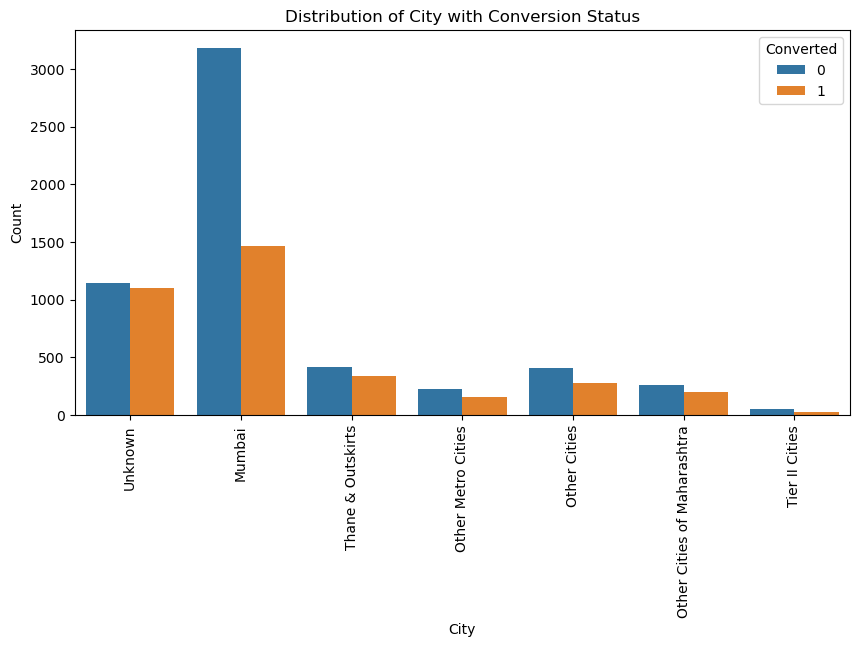

In [46]:
#plotting spread of City columnn

plt.figure(figsize=(10, 5))
s1 = sns.countplot(x='City', hue='Converted', data=data)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.title('Distribution of City with Conversion Status')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


In [47]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Select,Unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


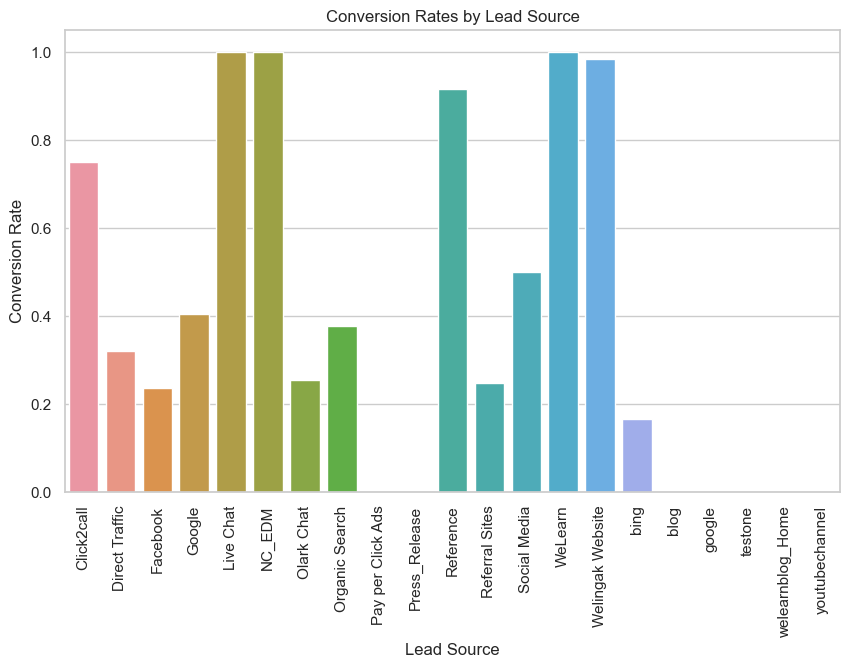

In [48]:
sns.set(style="whitegrid")

conversion_rates = data.groupby('Lead Source')['Converted'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Lead Source', y='Converted', data=conversion_rates)
plt.xticks(rotation=90)
plt.title('Conversion Rates by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Conversion Rate')
plt.show()

### Total Visits and Conversion

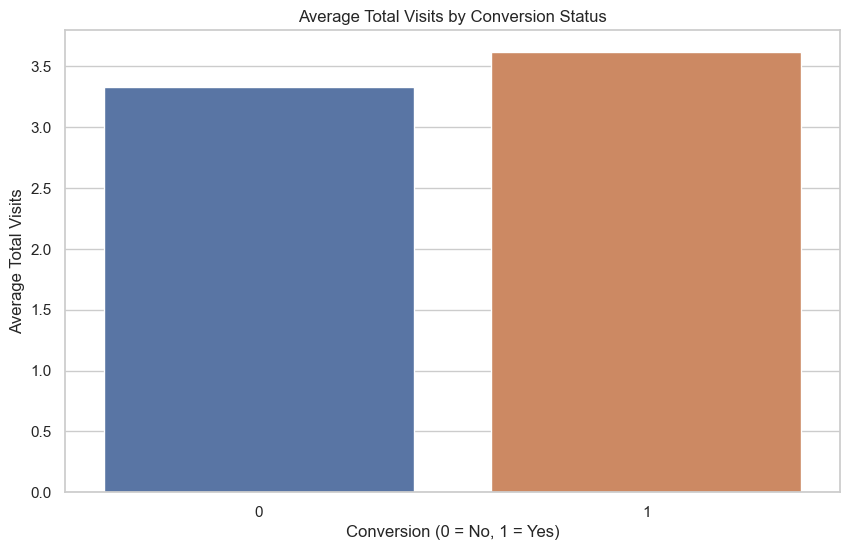

In [49]:
# Calculate the average number of total visits for each conversion status
average_visits_by_conversion = data.groupby('Converted')['TotalVisits'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Converted', y='TotalVisits', data=average_visits_by_conversion)
plt.title('Average Total Visits by Conversion Status')
plt.xlabel('Conversion (0 = No, 1 = Yes)')
plt.ylabel('Average Total Visits')
plt.show()


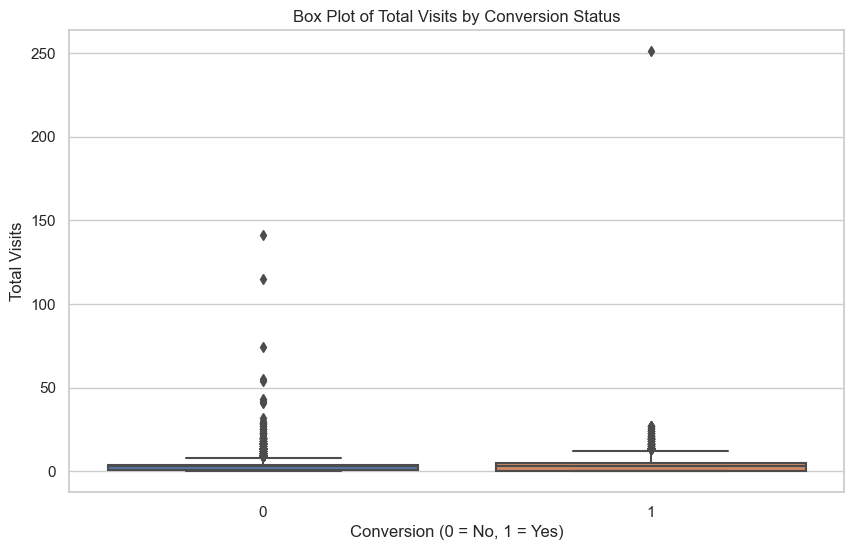

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted', y='TotalVisits', data=data)
plt.title('Box Plot of Total Visits by Conversion Status')
plt.xlabel('Conversion (0 = No, 1 = Yes)')
plt.ylabel('Total Visits')
plt.show()

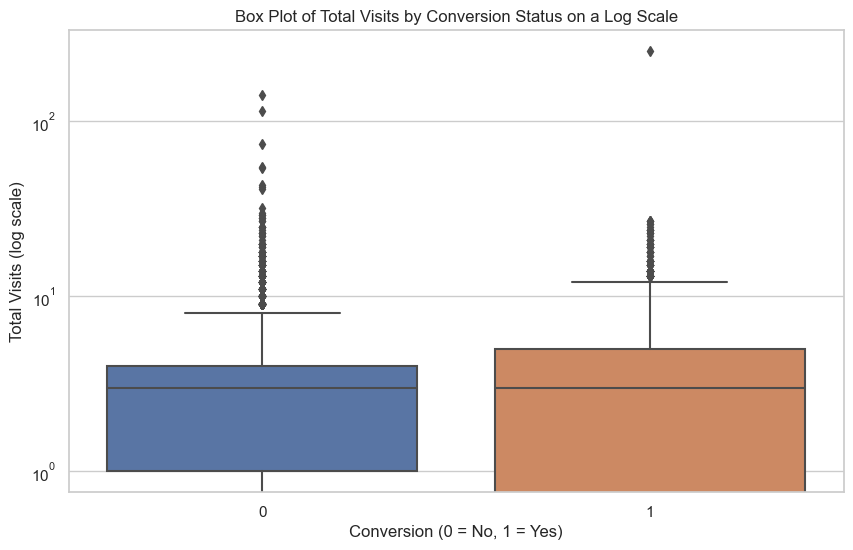

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted', y='TotalVisits', data=data)
plt.yscale('log')  # Setting the y-axis to a log scale
plt.title('Box Plot of Total Visits by Conversion Status on a Log Scale')
plt.xlabel('Conversion (0 = No, 1 = Yes)')
plt.ylabel('Total Visits (log scale)')
plt.show()


### Activity and Conversion

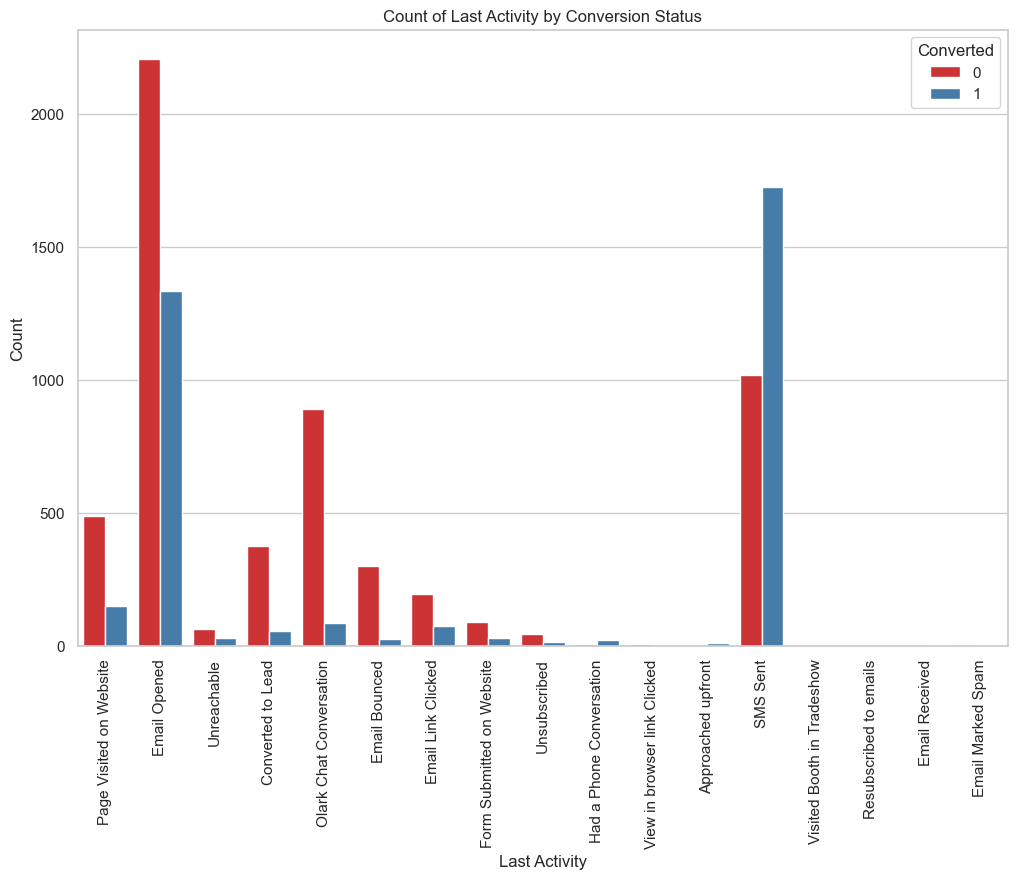

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the countplot with hue for conversion status
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
count_plot = sns.countplot(x='Last Activity', hue='Converted', data=data, palette='Set1')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90)  # Rotate the x labels for better readability
plt.title('Count of Last Activity by Conversion Status')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')  # Modify legend location as needed
plt.show()


### City and Conversion Rates

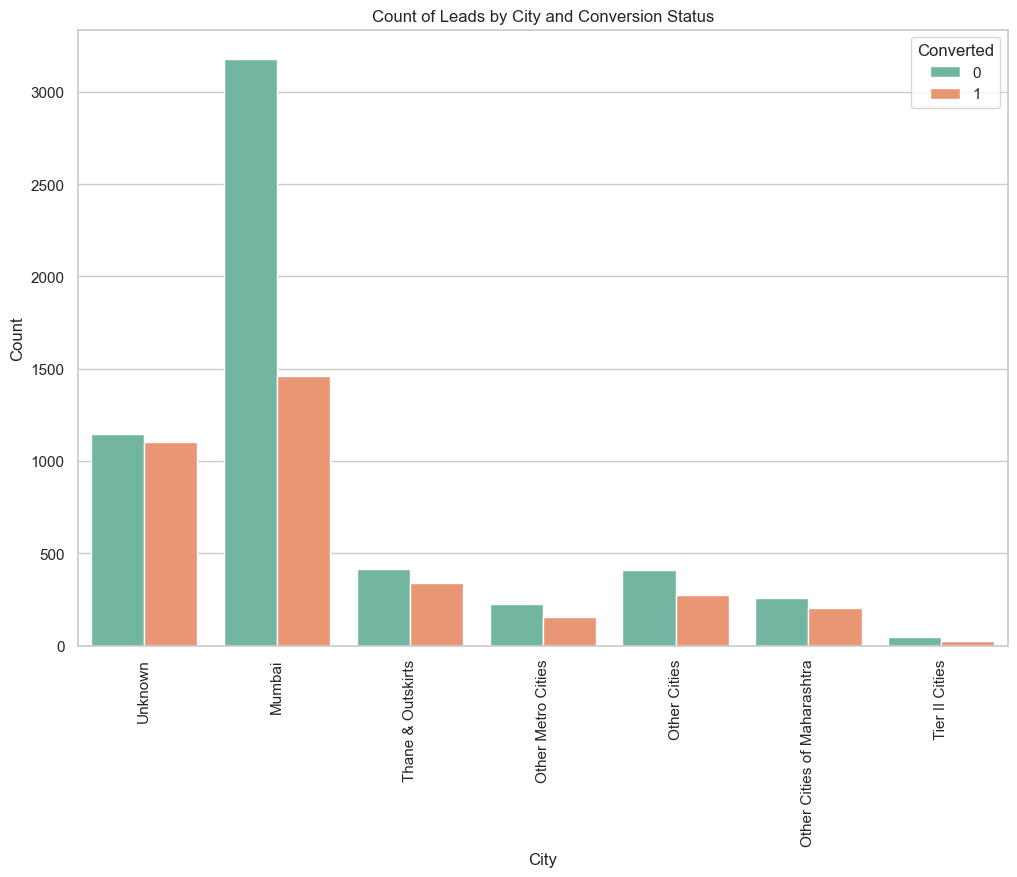

In [53]:
# Create the countplot with hue for conversion status
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
count_plot = sns.countplot(x='City', hue='Converted', data=data, palette='Set2')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90)  # Rotate the x labels for better readability
plt.title('Count of Leads by City and Conversion Status')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')  # Modify legend location as needed
plt.show()


#### Conversion by Current Occupation:

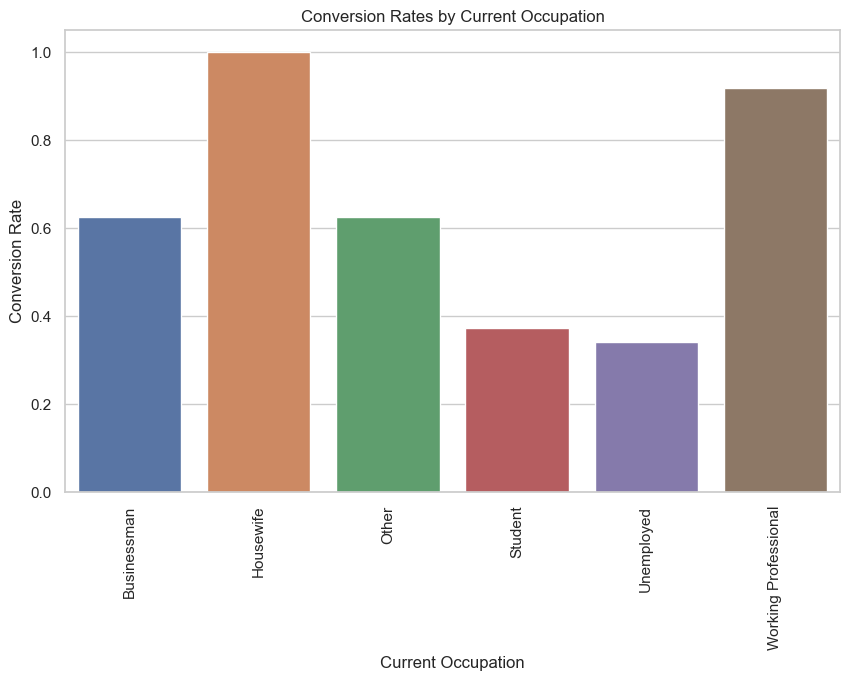

In [54]:
# Calculate conversion rate by occupation
occupation_conversion = data.groupby('What is your current occupation')['Converted'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='What is your current occupation', y='Converted', data=occupation_conversion)
plt.xticks(rotation=90)
plt.title('Conversion Rates by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Conversion Rate')
plt.show()


In [55]:
## Numerical Columns

In [56]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Select,Unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


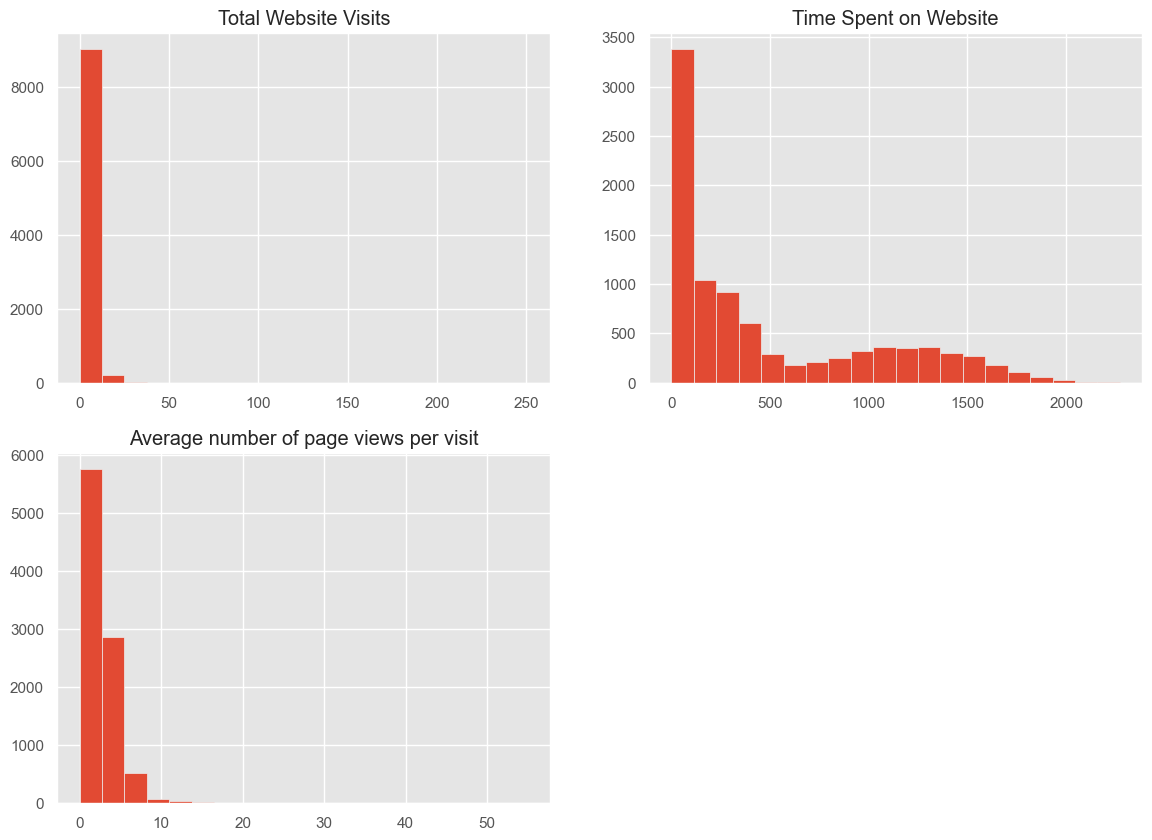

In [57]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize=(14, 10))

# Total Visits histogram
plt.subplot(2, 2, 1)
plt.hist(data['TotalVisits'], bins=20)
plt.title('Total Website Visits')

# Total Time Spent on Website histogram
plt.subplot(2, 2, 2)
plt.hist(data['Total Time Spent on Website'], bins=20)
plt.title('Time Spent on Website')

plt.subplot(2, 2, 3)
plt.hist(data['Page Views Per Visit'], bins = 20)
plt.title('Average number of page views per visit')

plt.show()


##### Observation:High peaks and skewed data. There might be a possibility of outliers

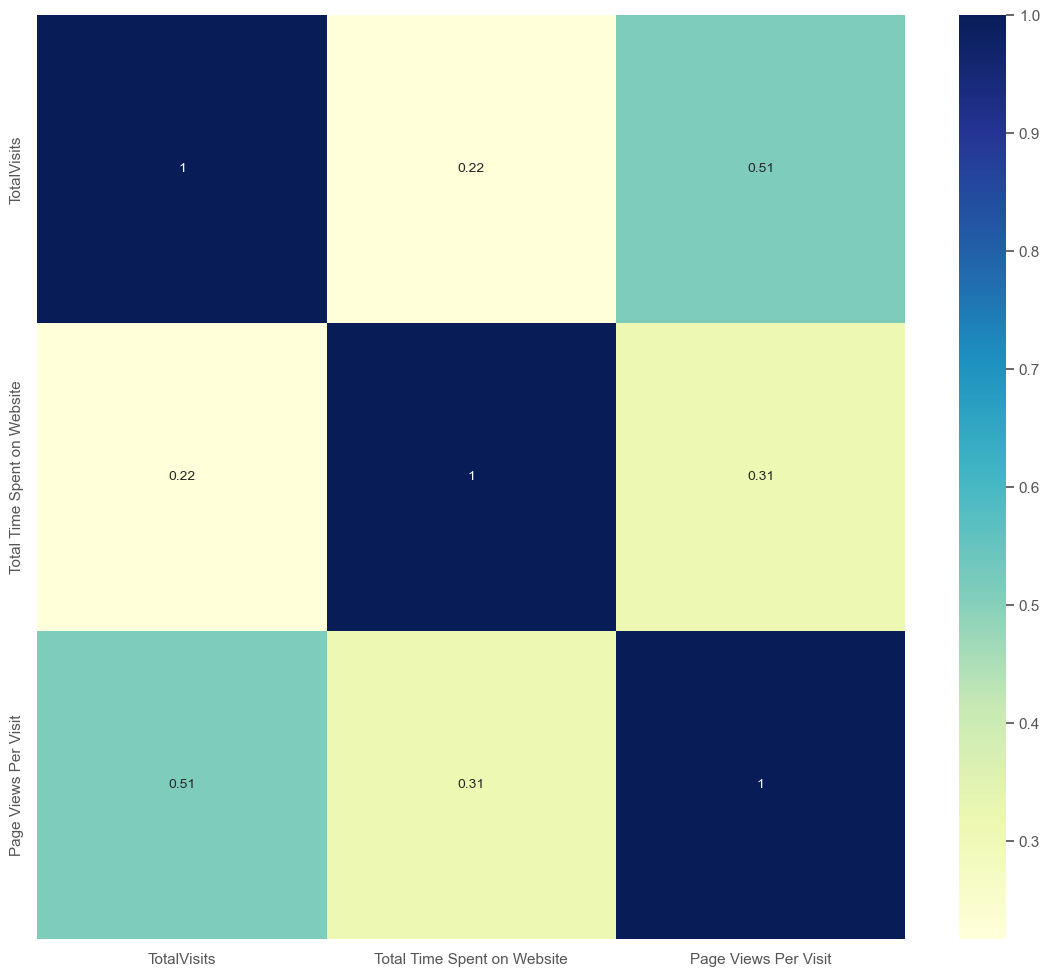

In [58]:
plt.figure(figsize = (14,12))
sns.heatmap(data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [59]:
## No Significant correlation between the variables

In [60]:
## Checking for Outliers

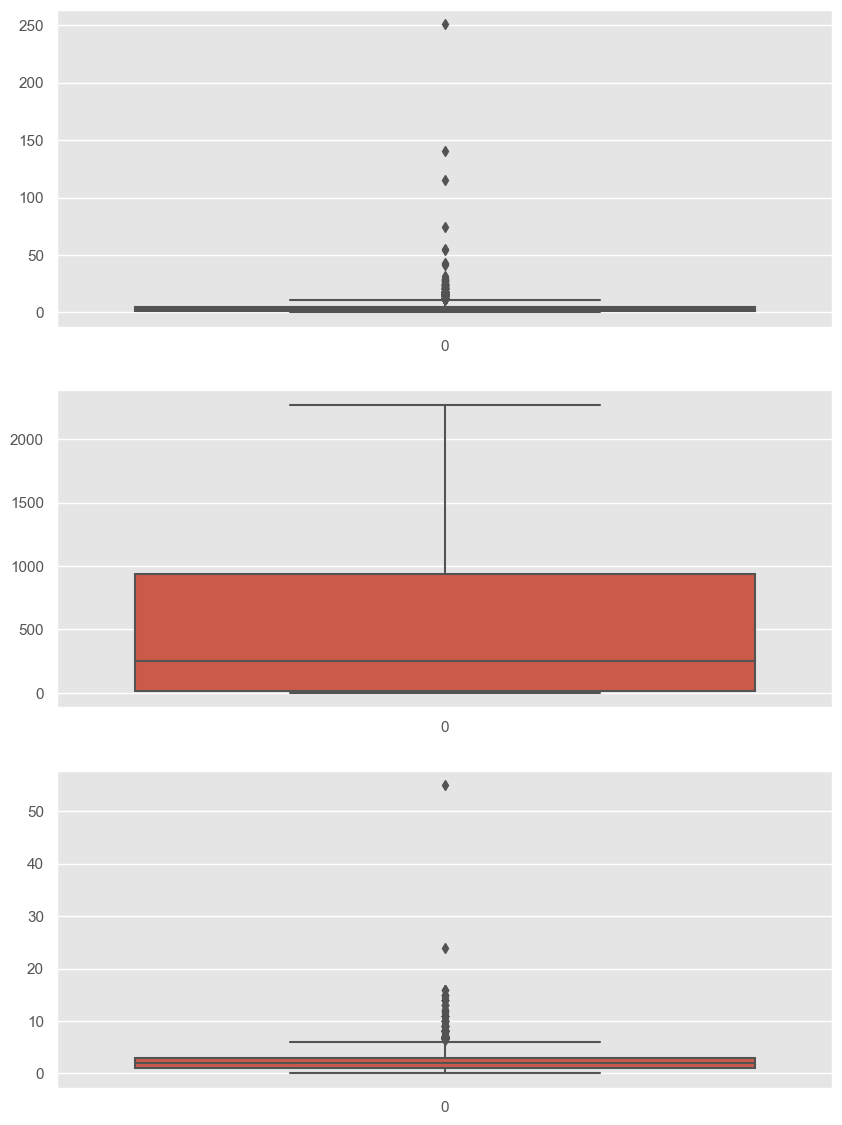

In [61]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(data.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(data['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(data['Page Views Per Visit'])
plt.show()

In [62]:
## Looking at the boxlots, we can see that Total Visits and Page Views Per Visit both have upper bound outliers

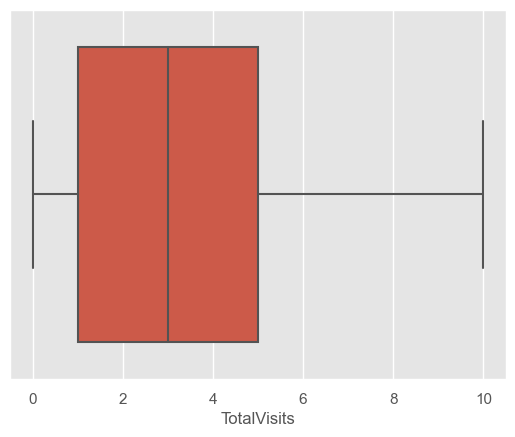

In [63]:
# Cap the data at the 5th and 95th percentiles
for column in ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']:  # Add your columns
    lower_percentile = data[column].quantile(0.05)
    upper_percentile = data[column].quantile(0.95)
    data[column] = np.where(data[column] < lower_percentile, lower_percentile, data[column])
    data[column] = np.where(data[column] > upper_percentile, upper_percentile, data[column])

# Check the updated boxplots
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['TotalVisits'])
plt.show()


##### Let see the Lead Origin Column with the Converted Status

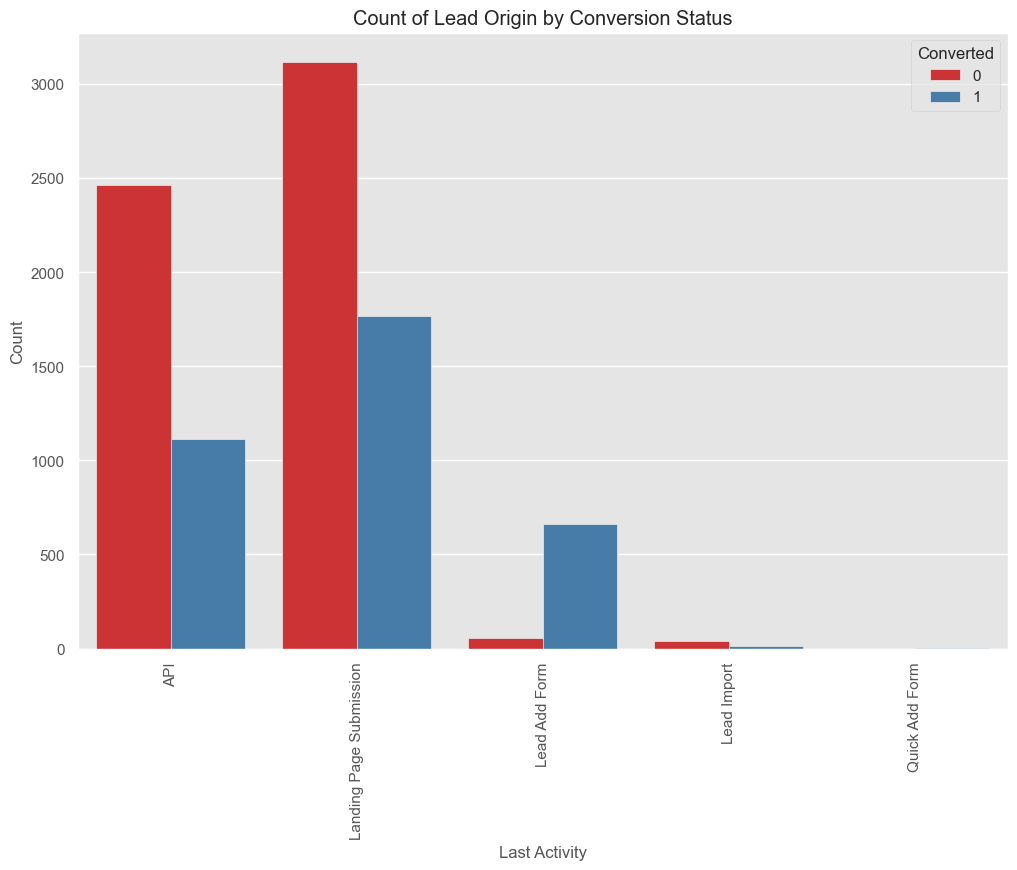

In [64]:

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
count_plot = sns.countplot(x='Lead Origin', hue='Converted', data=data, palette='Set1')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90)  # Rotate the x labels for better readability
plt.title('Count of Lead Origin by Conversion Status')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')  # Modify legend location as needed
plt.show()


In [65]:
data.rename(columns={
    'What is your current occupation': 'CurrentOccupation',
    'What matters most to you in choosing a course': 'ChoosingCourseCriteria'
}, inplace=True)

In [66]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,CurrentOccupation,ChoosingCourseCriteria,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674.0,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Select,Unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


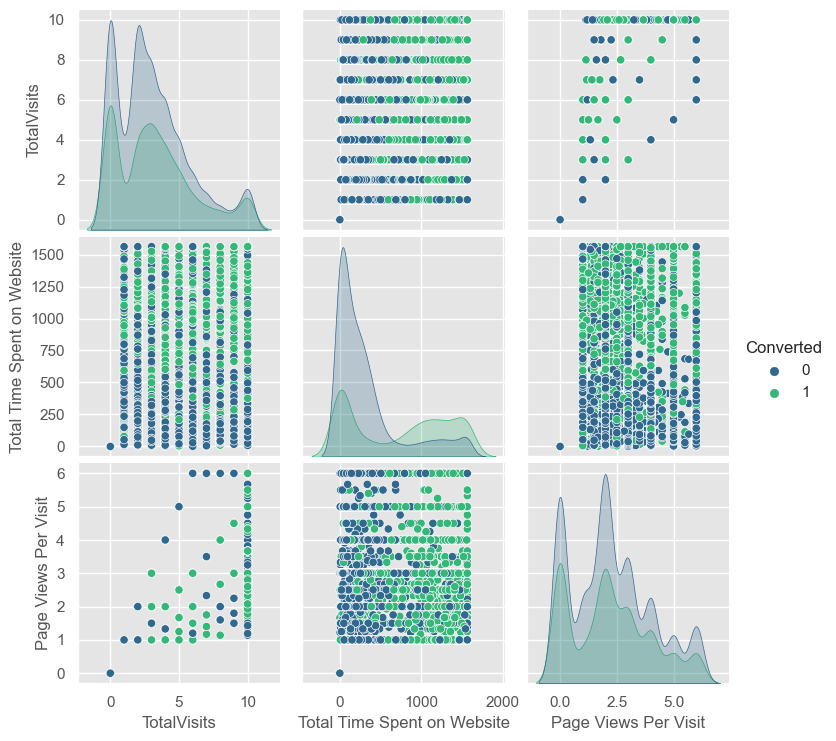

In [67]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

sns.pairplot(numerical_data, hue='Converted', palette='viridis', diag_kind='kde')
plt.show()

1. Distribution Patterns:
Total Visits: The distribution for both converted and non-converted leads is heavily skewed towards lower values, indicating most leads have few visits. However, there are outliers with a very high number of visits.
Total Time Spent on Website: Similar to Total Visits, the time spent on the website is also skewed towards lower values. There's a visible difference in the spread between converted and non-converted leads, suggesting that those who spend more time tend to convert more often.
Page Views Per Visit: This metric also shows a skew towards lower numbers with some outliers, but the distribution is more concentrated in lower values compared to Total Visits and Total Time Spent.
2. Relationships Between Variables:
Total Visits and Total Time Spent on Website: There seems to be a moderate positive correlation between these two variables. Higher total visits correlate with more time spent on the website, which is intuitive as more visits would typically allow for more time to engage with the content.
Total Visits and Page Views Per Visit: The correlation here is less clear, but generally, more visits do not necessarily mean a higher page view per visit ratio, suggesting that the effectiveness of visits in terms of page engagement varies.
Total Time Spent on Website and Page Views Per Visit: This relationship shows that higher page views per visit somewhat correlate with more time spent on the website, indicating that engaging content that leads to multiple page views can also retain visitors longer.
3. Impact of Conversions:
Converted leads (green dots) generally seem to cluster in regions of higher engagement across all metrics (more visits, more time on the website, and higher page views per visit). This clustering suggests that engagement metrics are strong indicators of potential conversion.
There are distinct behaviors observable between converted and non-converted leads, especially in how the distributions of these engagement metrics shift higher for those who converted.
4. Potential Outliers:
There are outliers in all three metrics, particularly in Total Visits and Total Time Spent on Website. These outliers could represent specific user segments that are either very engaged or bots/spam traffic, which might need further investigation to understand their impact on the data.
5. Strategic Implications:
Focusing on strategies that increase user engagement, as indicated by these metrics, could improve conversion rates.
Further analysis might involve segmenting these leads based on their behavior patterns to tailor specific interventions or marketing strategies that can convert even those with lower engagement.


In [68]:
data.shape

(9240, 30)

In [69]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,CurrentOccupation,ChoosingCourseCriteria,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674.0,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Select,Unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


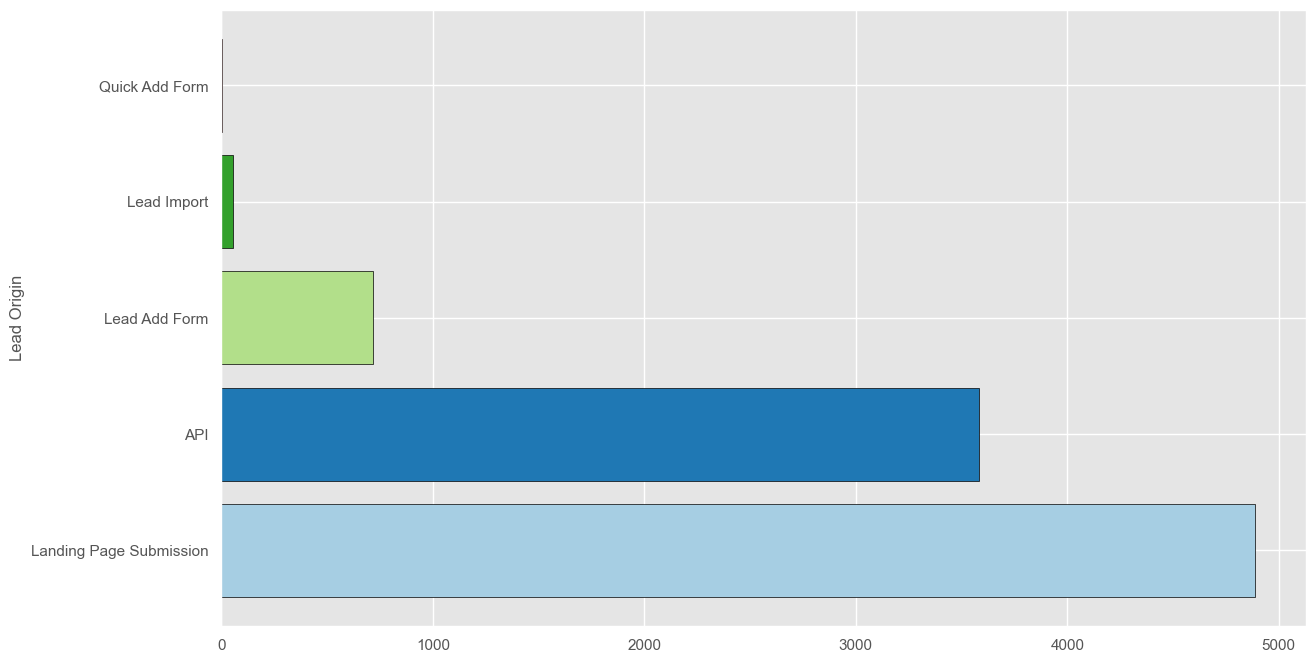

In [70]:
plt.figure(figsize = (14, 8))

data.groupby('Lead Origin')['Lead Source'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(data))))
plt.show()

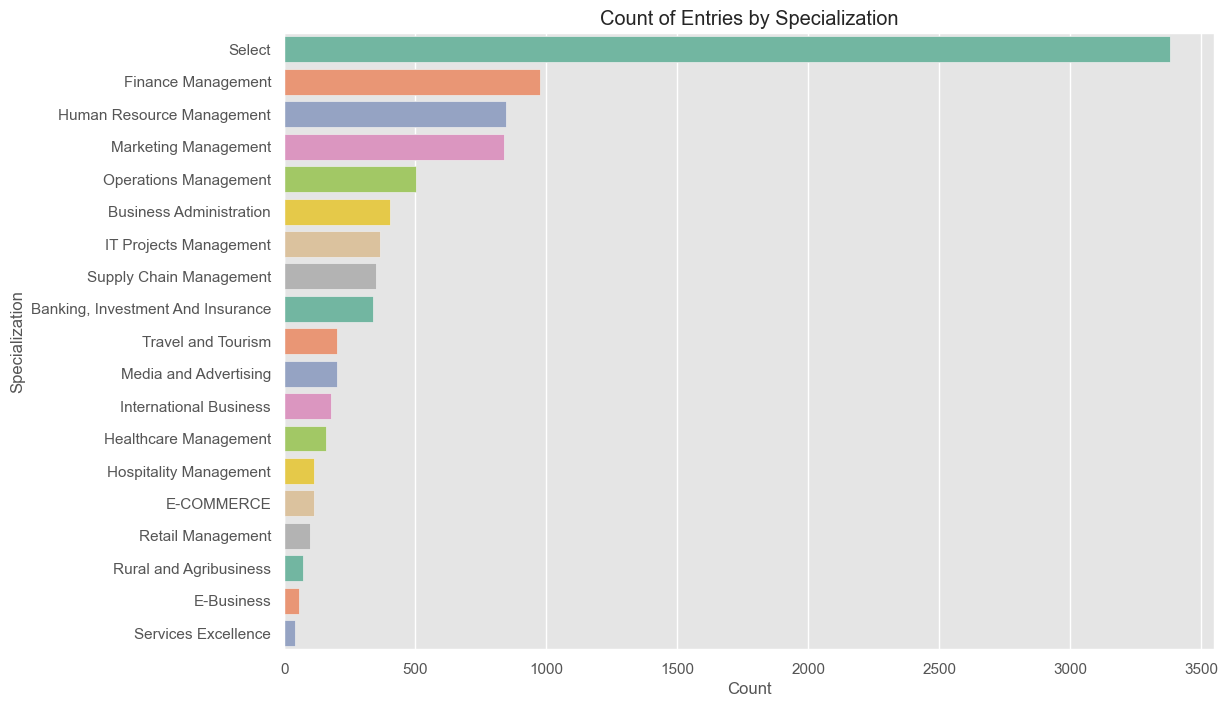

In [71]:
plt.figure(figsize=(12, 8))  # Set the figure size as per your preference
sns.countplot(y='Specialization', data=data, order=data['Specialization'].value_counts().index, palette='Set2')
plt.title('Count of Entries by Specialization')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()

In [72]:
## Treating the specilization column with the Select Values
data['Specialization'] = data['Specialization'].replace('Select', 'Unknown')

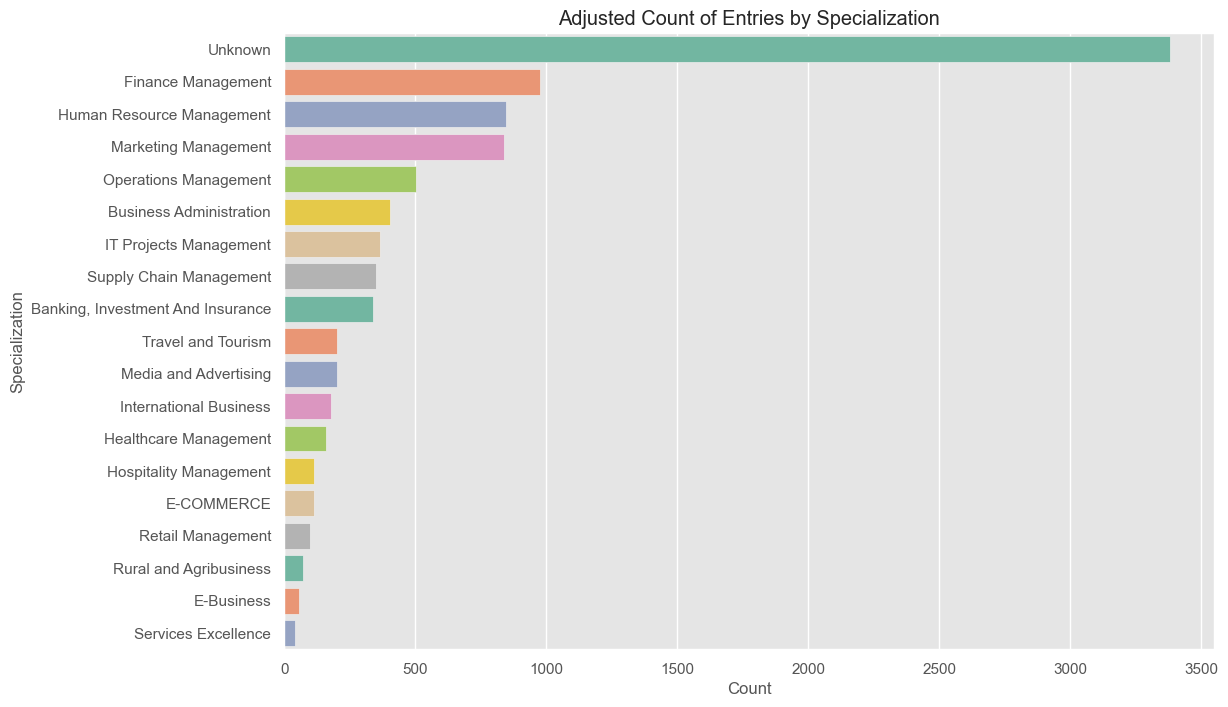

In [73]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Specialization', data=data, order=data['Specialization'].value_counts().index, palette='Set2')
plt.title('Adjusted Count of Entries by Specialization')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()

In [74]:

threshold = 100

# Create a mapping for less common specializations
counts = data['Specialization'].value_counts()
to_replace = counts[counts <= threshold].index
data['Specialization'] = data['Specialization'].replace(to_replace, 'Other')

# Now, 'Other' contains all rare specializations


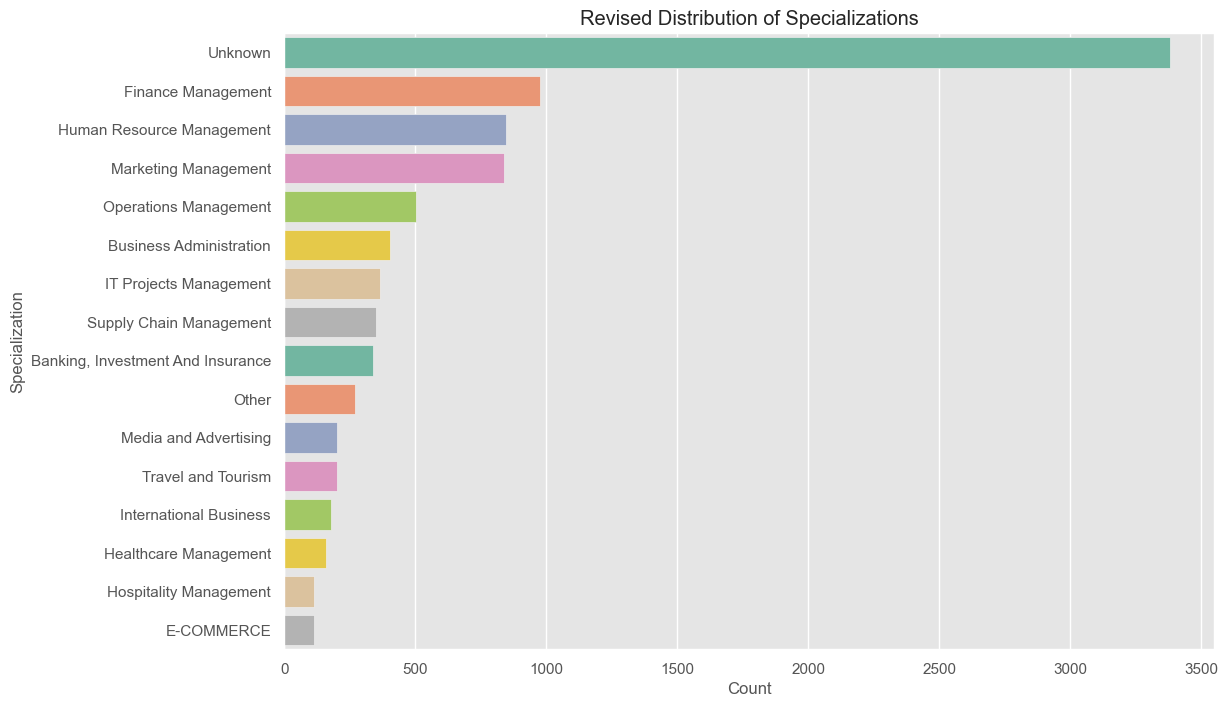

In [75]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Specialization', data=data, order=data['Specialization'].value_counts().index, palette='Set2')
plt.title('Revised Distribution of Specializations')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()


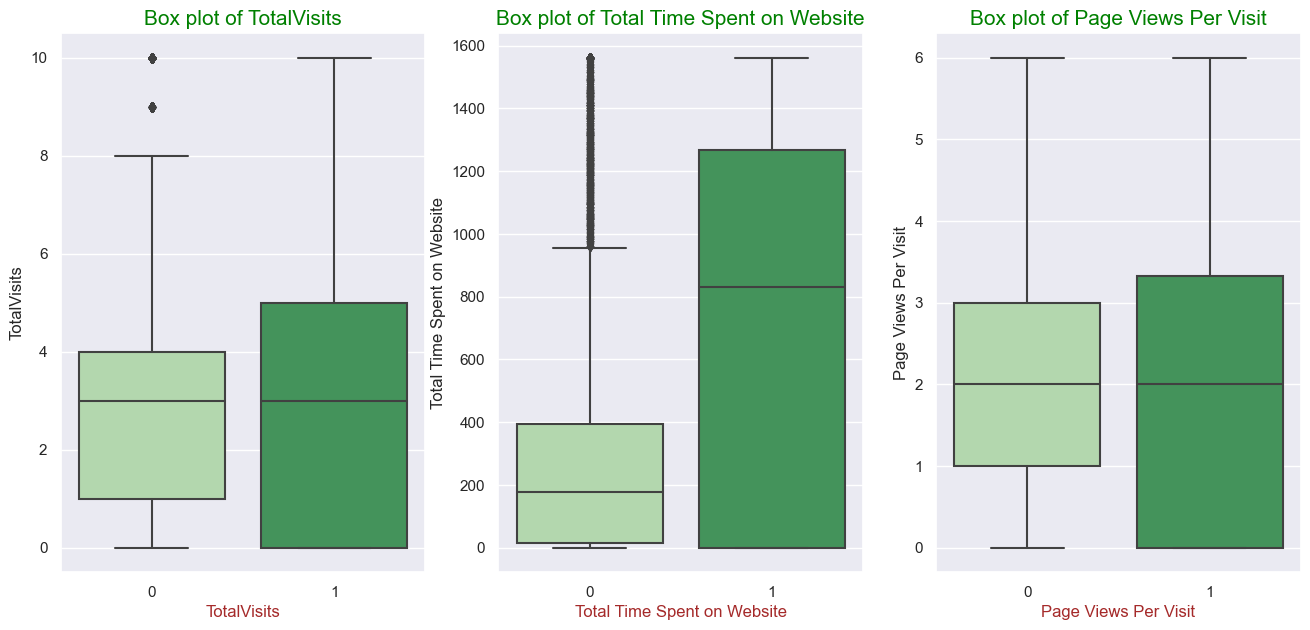

In [76]:
#Box plot of selected numeric columns

cols_to_check= ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

sns.set(font_scale = 1)
plt.figure(figsize=[16,7])

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1,3,i)
    title_text= f'Box plot of {col}'
    x_label= f'{col}'
    fig = sns.boxplot(data= data, y= col, x= 'Converted', palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 15, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})

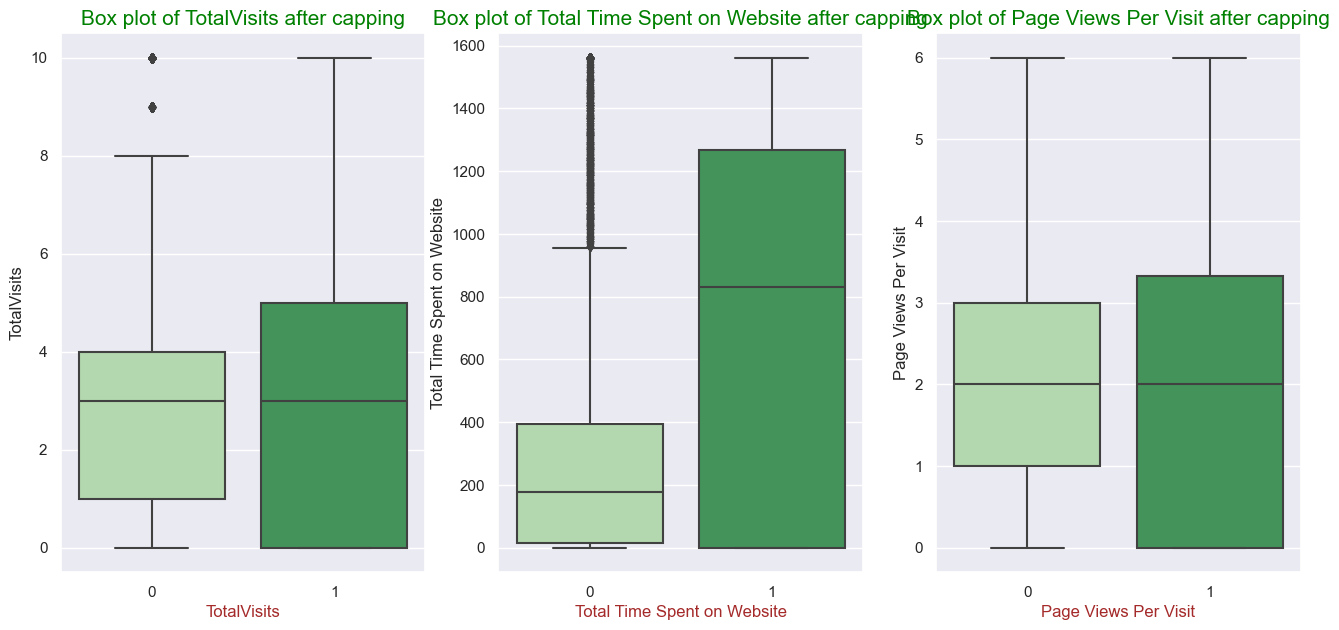

In [77]:
## handling Outliers
import pandas as pd

# Defining the columns to check
cols_to_check = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Applying capping for each column
for col in cols_to_check:
    # Calculate the 1st and 99th percentiles
    lower_bound = data[col].quantile(0.01)
    upper_bound = data[col].quantile(0.99)
    
    # Apply the capping
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Re-plot the box plots to check the changes
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)
plt.figure(figsize=[16,7])

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1,3,i)
    title_text = f'Box plot of {col} after capping'
    x_label = col
    fig = sns.boxplot(data=data, y=col, x='Converted', palette='Greens')
    fig.set_title(title_text, fontdict={'fontsize': 15, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict={'fontsize': 12, 'color': 'Brown'})

plt.show()


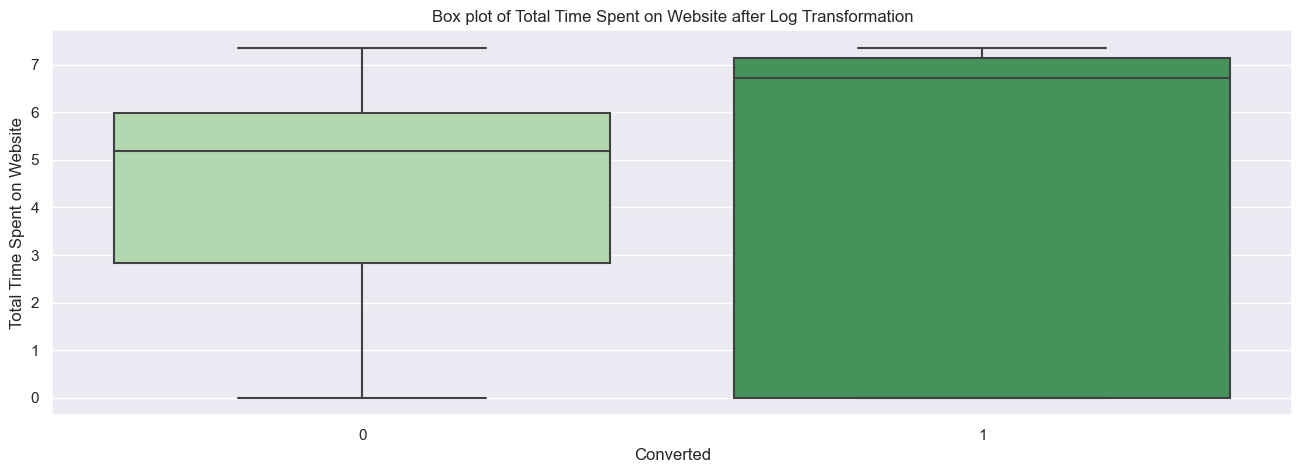

In [78]:
import numpy as np

# Apply a log transformation to 'Total Time Spent on Website'
data['Total Time Spent on Website'] = np.log1p(data['Total Time Spent on Website'])
plt.figure(figsize=[16, 5])
sns.boxplot(data=data, y='Total Time Spent on Website', x='Converted', palette='Greens')
plt.title('Box plot of Total Time Spent on Website after Log Transformation')
plt.show()


In [79]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,CurrentOccupation,ChoosingCourseCriteria,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.000000,0.0,Page Visited on Website,Unknown,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,6.514713,2.5,Email Opened,Unknown,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Select,Unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,7.334982,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,5.723585,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,7.264730,1.0,Converted to Lead,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [80]:
data.Search.value_counts()

Search
No     9226
Yes      14
Name: count, dtype: int64

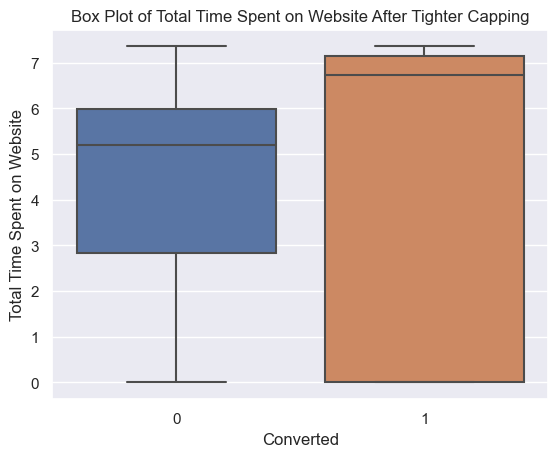

In [81]:
# Capping data at the 5th and 95th percentiles
lower_percentile = data['Total Time Spent on Website'].quantile(0.05)
upper_percentile = data['Total Time Spent on Website'].quantile(0.95)

data['Total Time Spent on Website'] = data['Total Time Spent on Website'].clip(lower=lower_percentile, upper=upper_percentile)

# Plot the revised box plot to see the effect of capping
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Converted', y='Total Time Spent on Website', data=data)
plt.title('Box Plot of Total Time Spent on Website After Tighter Capping')
plt.show()


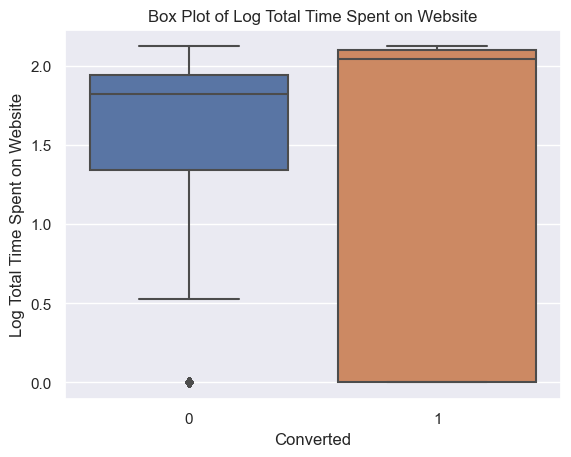

In [82]:
import numpy as np

# Apply a logarithmic transformation
data['Log Total Time Spent on Website'] = np.log1p(data['Total Time Spent on Website'])

# Plot the revised box plot to see the effect of the transformation
sns.boxplot(x='Converted', y='Log Total Time Spent on Website', data=data)
plt.title('Box Plot of Log Total Time Spent on Website')
plt.show()


In [83]:
# Checking the percentage of missing values in each column
missing_percent = data.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


Series([], dtype: float64)


### Feature Engineering

In [84]:
# Example: Creating an interaction term between 'TotalVisits' and 'Total Time Spent on Website'
data['Interaction_Visits_Time'] = data['TotalVisits'] * data['Total Time Spent on Website']

# Check the new column
print(data[['TotalVisits', 'Total Time Spent on Website', 'Interaction_Visits_Time']].head())


   TotalVisits  Total Time Spent on Website  Interaction_Visits_Time
0          0.0                     0.000000                 0.000000
1          5.0                     6.514713                32.573563
2          2.0                     7.334982                14.669964
3          1.0                     5.723585                 5.723585
4          2.0                     7.264730                14.529460


In [85]:
### segmenting numerical features into Bins

In [86]:
# Binning 'Total Time Spent on Website' into categories
data['Time_Spent_Binned'] = pd.cut(data['Total Time Spent on Website'], bins=[0, 200, 400, 600, 800, np.inf], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Check the new binned column
print(data[['Total Time Spent on Website', 'Time_Spent_Binned']].head())


   Total Time Spent on Website Time_Spent_Binned
0                     0.000000               NaN
1                     6.514713          Very Low
2                     7.334982          Very Low
3                     5.723585          Very Low
4                     7.264730          Very Low


In [87]:
# Standardizing the data before applying PCA
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']  # example features
# Ensure no missing values and these are all numeric features
data_scaled = StandardScaler().fit_transform(data[features])

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for example
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Check the result
print(pca_df.head())

# Explained variance ratio
print(pca.explained_variance_ratio_)  # This tells us how much information (variance) is captured by the first two components


   Principal Component 1  Principal Component 2
0              -2.332958               0.439959
1               0.871619              -0.248223
2               0.232744              -1.103791
3              -0.637791              -0.952742
4              -0.116871              -1.242025
[0.78317557 0.14072767]


#### Model Building And Evaluation

In [88]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,CurrentOccupation,ChoosingCourseCriteria,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Log Total Time Spent on Website,Interaction_Visits_Time,Time_Spent_Binned
0,API,Olark Chat,No,No,0,0.0,0.000000,0.0,Page Visited on Website,Unknown,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Unknown,No,No,Modified,0.000000,0.000000,NaN
1,API,Organic Search,No,No,0,5.0,6.514713,2.5,Email Opened,Unknown,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Select,Unknown,No,No,Email Opened,2.016863,32.573563,Very Low
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,7.334982,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened,2.120461,14.669964,Very Low
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,5.723585,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified,1.905622,5.723585,Very Low
4,Landing Page Submission,Google,No,No,1,2.0,7.264730,1.0,Converted to Lead,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified,2.111997,14.529460,Very Low


In [89]:
# List of variables to map

varlist =  ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [90]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,CurrentOccupation,ChoosingCourseCriteria,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Log Total Time Spent on Website,Interaction_Visits_Time,Time_Spent_Binned
0,API,Olark Chat,No,No,0,0.0,0.000000,0.0,Page Visited on Website,Unknown,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,No,Select,Unknown,0,0,Modified,0.000000,0.000000,NaN
1,API,Organic Search,No,No,0,5.0,6.514713,2.5,Email Opened,Unknown,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Might be,0,No,Select,Unknown,0,0,Email Opened,2.016863,32.573563,Very Low
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,7.334982,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,No,Potential Lead,Mumbai,0,1,Email Opened,2.120461,14.669964,Very Low
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,5.723585,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,No,Select,Mumbai,0,0,Modified,1.905622,5.723585,Very Low
4,Landing Page Submission,Google,No,No,1,2.0,7.264730,1.0,Converted to Lead,Unknown,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,No,Select,Mumbai,0,0,Modified,2.111997,14.529460,Very Low


In [91]:

varlist =  ['Get updates on DM Content']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [92]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,CurrentOccupation,ChoosingCourseCriteria,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Log Total Time Spent on Website,Interaction_Visits_Time,Time_Spent_Binned
0,API,Olark Chat,No,No,0,0.0,0.000000,0.0,Page Visited on Website,Unknown,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Unknown,0,0,Modified,0.000000,0.000000,NaN
1,API,Organic Search,No,No,0,5.0,6.514713,2.5,Email Opened,Unknown,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Might be,0,0,Select,Unknown,0,0,Email Opened,2.016863,32.573563,Very Low
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,7.334982,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,1,Email Opened,2.120461,14.669964,Very Low
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,5.723585,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,0,0,Modified,1.905622,5.723585,Very Low
4,Landing Page Submission,Google,No,No,1,2.0,7.264730,1.0,Converted to Lead,Unknown,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,0,0,Modified,2.111997,14.529460,Very Low


In [93]:
categorical_cols = data.select_dtypes(include=['object']).columns

# Creating dummy variables for all categorical columns
# drop_first=False if you need binary representation for all unique values
dummies = pd.get_dummies(data[categorical_cols], drop_first=False)

# You might want to ensure binary output, so let's cast to int
dummies = dummies.astype(int)

# Dropping the original categorical columns from the dataset
data.drop(columns=categorical_cols, inplace=True)

# Concatenating the original DataFrame (without the categorical columns) with the new dummy DataFrame
data = pd.concat([data, dummies], axis=1)

# Display the first few rows to confirm the changes
print(data.head())


   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                     0.000000                   0.0   
1          0          5.0                     6.514713                   2.5   
2          1          2.0                     7.334982                   2.0   
3          0          1.0                     5.723585                   1.0   
4          1          2.0                     7.264730                   1.0   

   Search  Magazine  Newspaper Article  X Education Forums  Newspaper  \
0       0         0                  0                   0          0   
1       0         0                  0                   0          0   
2       0         0                  0                   0          0   
3       0         0                  0                   0          0   
4       0         0                  0                   0          0   

   Digital Advertisement  Through Recommendations  \
0                      0   

In [94]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Log Total Time Spent on Website,Interaction_Visits_Time,Time_Spent_Binned,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,ChoosingCourseCriteria_Better Career Prospects,ChoosingCourseCriteria_Flexibility & Convenience,ChoosingCourseCriteria_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Sel

In [95]:
data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Log Total Time Spent on Website,Interaction_Visits_Time,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,ChoosingCourseCriteria_Better Career Prospects,ChoosingCourseCriteria_Flexibility & Convenience,ChoosingCourseCriteria_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_S

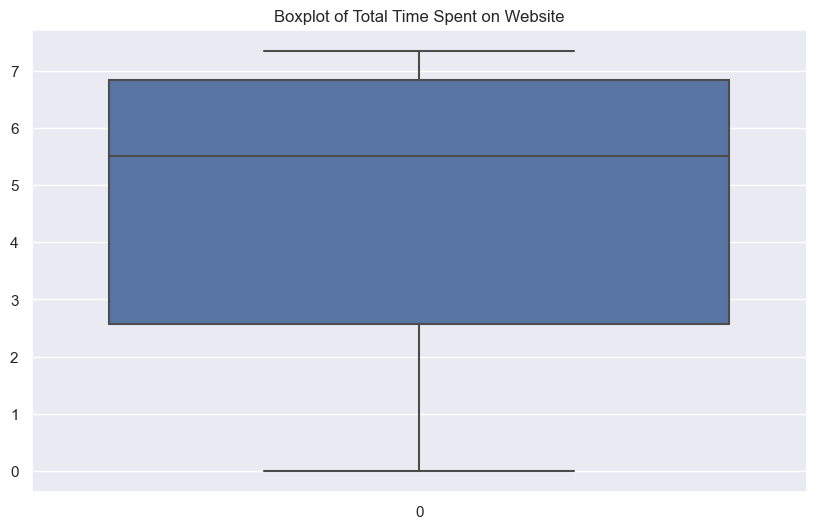

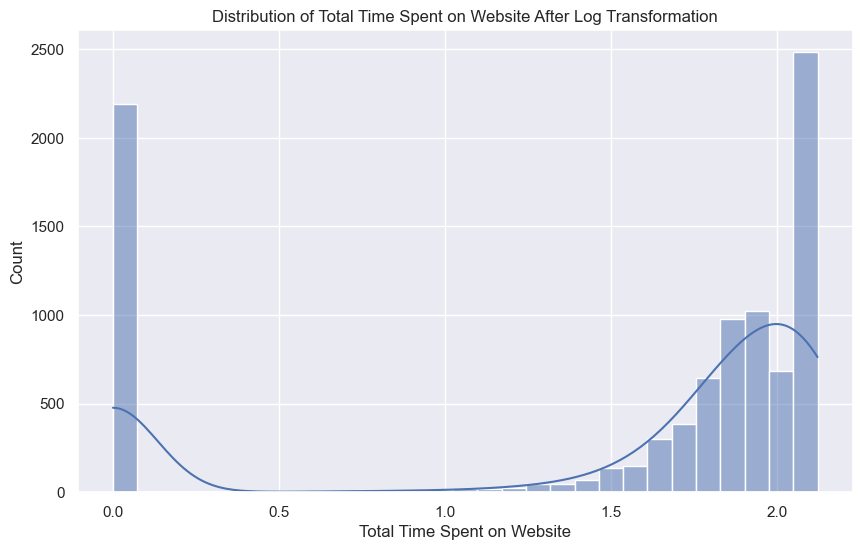

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: Visualizing 'Total Time Spent on Website'
plt.figure(figsize=(10, 6))
sns.boxplot(data['Total Time Spent on Website'])
plt.title('Boxplot of Total Time Spent on Website')
plt.show()

# Applying a log transformation if the data is skewed
data['Total Time Spent on Website'] = np.log1p(data['Total Time Spent on Website'])

# Re-checking the distribution after transformation
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Time Spent on Website'], kde=True)
plt.title('Distribution of Total Time Spent on Website After Log Transformation')
plt.show()


Zero Variance Features:features where the minimum and maximum values are the same, which would indicate no variance. These features do not contribute to model performance and can be removed.

In [97]:
numeric_cols = data.select_dtypes(include=['number']).columns

# Find columns with zero variance among numeric columns
zero_variance_cols = data[numeric_cols].columns[data[numeric_cols].var() == 0]

# Drop these columns from the DataFrame
data.drop(columns=zero_variance_cols, inplace=True)

# Display the columns that were dropped and the updated DataFrame
print("Dropped columns with zero variance:", zero_variance_cols)
print("Updated DataFrame shape:", data.shape)

Dropped columns with zero variance: Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')
Updated DataFrame shape: (9240, 156)


In [98]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Log Total Time Spent on Website,Interaction_Visits_Time,Time_Spent_Binned,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,ChoosingCourseCriteria_Better Career Prospects,ChoosingCourseCriteria_Flexibility & Convenience,ChoosingCourseCriteria_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,

In [99]:
data.shape

(9240, 156)